# Comparacion mediciones cajón y suelo
nivel de prioridad: $\color{red}{Alto}$

Queremos comparar las mediciones tomadas en el cajon de casa para labo 7 con las mediciones hechas en el iafe. La idea es ver si son análogas (con algun factor de atenuacion) o si no tienen nada que ver

La medicion de labo 7 que vamos a utilizar en princiopio es la de S1 a 45cm ya que le disparamos a la chapa dentro del cajón. comparamos con la medicion S1 realizada en el IAFE el 09/06 para la altura mas similar (44cm)

In [60]:
import numpy as np
from scipy import signal
from scipy.fftpack import fft, fftfreq, fftshift
from matplotlib import pyplot as plt

import os

In [61]:
%run FFT_ordenada.ipynb
%run to_baseband.ipynb
%run to_dB.ipynb

In [62]:
## Parámetros de la medición

Fs = 23.328e9 #Frecuencia de muestreo [Hz] 
Ts = 1/Fs
BW = 1.5e9 

portadora = 'Fc8'
Fc, fc = '8.74GHz', 8.748e9
señal = 'S1'
altura = '2/'
D= '45cm'


In [63]:
##----------------PREPROCESAMIENTO DE LAS SEÑALES----------------------------##

sistema = 'ubuntu'

if sistema == 'ubuntu':
    ##----Ubuntu----##
    #código para gordotony#
    path_t = '/home/gordotony/Documents/GitHub/tesis/mediciones_09_06/S1/'
    path_l7 = '/home/gordotony/Documents/GitHub/L6y7/'
    
    #para tesis:
    # cuento el número de archivos S1 en el directorio
    med_t = os.listdir(path_t+portadora+'/'+altura)
    N_med_t = int(len(med_t))
    print('# mediciones para S1(tesis) =',N_med_t)

    # miro la longitud de cada medición S1
    L_data_S1 = np.zeros(N_med_t, dtype=int)

    for i in range(N_med_t): 
        I = str(i+1)
        len_data_S1 = int(len(open(path_t+portadora+'/'+altura+I+'_S1.txt').readlines()))
        L_data_S1[i] = len_data_S1
        print('medición #'+I+' =',len_data_S1)

    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

    #para labo 7:
    #tengo un solo archivo S1 a esa altura
    len_data_l7 = int(len(open(path_l7+portadora+'/'+señal+'/'+señal+D+portadora+'.txt').readlines()))
    
    print('longitud medición S1(L7) =',len_data_l7)
    print()

    print('Si los tamaños de todaqs las medicioes son iguales se puede cotinuar, sino hay que recortar los archivos')
    
    
elif sistema == 'windows': 
    ##----Windows----##
    #codigo para coraline#
    path_S1 = r'C:\Users\Coraline\Documents\UWB\tesis\mediciones_09_06\S1'
    path_Z2 = r'C:\Users\Coraline\Documents\UWB\tesis\mediciones_09_06\Z2'
    
    ##COMPLETAR

    print('Si los tamaños de todaqs las medicioes son iguales se puede cotinuar, sino ay que recortar los archivos')
else:
    print('elegir sistema operativo')


# mediciones para S1(tesis) = 5
medición #1 = 285
medición #2 = 285
medición #3 = 285
medición #4 = 285
medición #5 = 285
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
longitud medición S1(L7) = 440

Si los tamaños de todaqs las medicioes son iguales se puede cotinuar, sino hay que recortar los archivos


In [64]:
end = int(len_data_S1-1)
S1t = np.zeros((int(len_data_S1-1),11,N_med_t),dtype=float)
#S1l = np.zeros((end-1,11),dtype=float)

if sistema == 'ubuntu':
    #importo S1(tesis)
    for i0 in range(N_med_t):
        I0 = str(i0+1)
        S1t[:,:,i0] = np.genfromtxt(path_t+portadora+'/'+altura+I0+'_S1.txt', delimiter=' ')

    #importo S1(labo7)
    S1l = np.genfromtxt(path_l7+portadora+'/'+señal+'/'+señal+D+portadora+'.txt',delimiter=' ')
    
elif sistema =='windows':
    print('completar')
    ##COMPLETAR
    
else:
    print('defnir sistema operativo')

dist = S1t[:,0,0]
S1t_avg  = np.mean(S1t[:,1:,:],axis=1)
S1t_avg = np.mean(S1t_avg[:,0:],axis=1)
print('tamaño de S1 =',np.shape(S1t_avg))

S1l = S1l[:end,:]
S1l_avg = np.mean(S1l[:,1:],axis=1)

print(np.shape(S1l_avg), np.shape(S1t_avg))

tamaño de S1 = (284,)
(284,) (284,)


In [65]:
#Transformo fourier
Nfft= 1024

S1t_fft = np.zeros(Nfft,dtype=complex)
S1l_fft = np.zeros(Nfft,dtype=complex)

frec_fft, S1t_fft = FFT_ordenada(S1t_avg,Nfft,Ts)
S1l_fft = FFT_ordenada(S1l_avg,Nfft,Ts)[1]

#corto frecuecias
Deltaf = 1.75e9
f_min = fc-Deltaf
f_max = fc+Deltaf
#f_min, f_max = 6.5e9, 11e9

f_pos = frec_fft[(frec_fft>f_min) & (frec_fft<f_max)]
n_frecs = len(f_pos)
start = int(np.min(np.where(frec_fft>f_min)))
end = int(np.max(np.where(frec_fft<f_max))+1)
f_norm = f_pos/1e9 # frec >0 normalizada en GHz

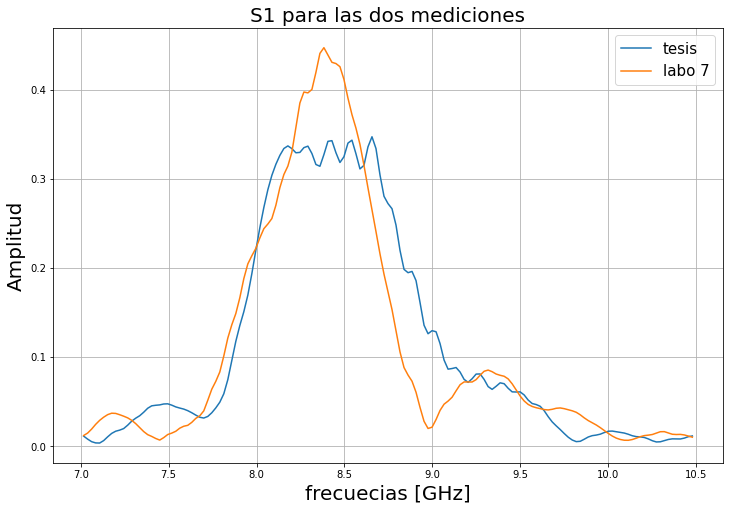

In [66]:
plt.figure(figsize=(12,8))
plt.plot(f_norm,np.abs(S1t_fft[start:end]),label='tesis')
plt.plot(f_norm,np.abs(S1l_fft[start:end]),label='labo 7')
plt.grid('on')
plt.legend(loc="best",fontsize=15)
plt.xlabel('frecuecias [GHz]',fontsize=20)
plt.ylabel('Amplitud',fontsize=20)
plt.title('S1 para las dos mediciones',fontsize=20)
plt.show()    

Text(0.5, 1.0, 'S1 y Z2 en BB')

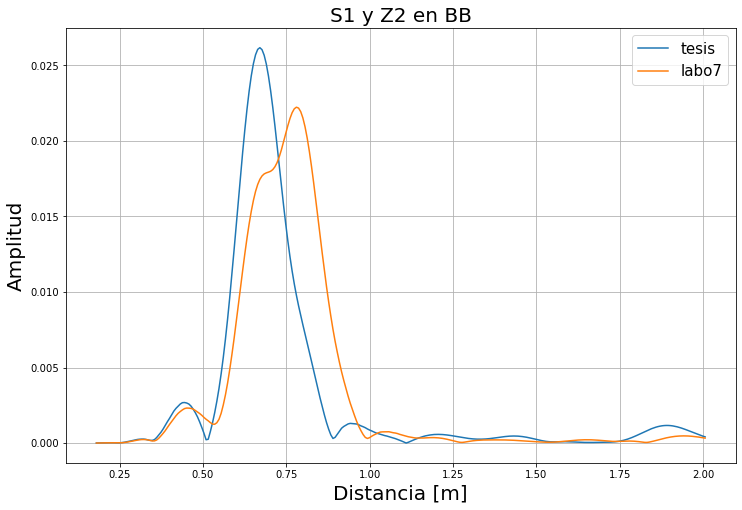

In [67]:
plt.figure(figsize=(12,8))
S1t_BB = np.zeros_like(S1t_avg,dtype=complex)
S1t_BB = to_baseband(S1t_avg,Ts,BW,fc)
plt.plot(dist,np.abs(S1t_BB),label='tesis')

S1l_BB = np.zeros_like(S1l_avg,dtype=complex)
S1l_BB = to_baseband(S1l_avg,Ts,BW,fc)
plt.plot(dist,np.abs(S1l_BB),label='labo7')

plt.grid('on')
plt.legend(loc="best",fontsize=15)
plt.xlabel('Distancia [m]',fontsize=20)
plt.ylabel('Amplitud',fontsize=20)
plt.title('S1 y Z2 en BB',fontsize=20)